# Import libraries and load datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
import time
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [64]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\Data Sets'

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
X = pd.read_csv(os.path.join(path,'DATASET weather_prediction_imputed.csv'), index_col = False)

In [113]:
X

,YEAR,MONTH,DAY,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960,1,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,1960,1,2,6,0.84,1.0180,0.36,1.05,1.1,6.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,1960,1,3,8,0.90,1.0180,0.18,0.30,0.0,8.5,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,1960,1,4,3,0.92,1.0180,0.58,0.00,4.1,6.3,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,1960,1,5,6,0.95,1.0180,0.65,0.14,5.4,3.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,2022,10,27,1,0.79,1.0248,1.34,0.22,7.7,15.9,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,2022,10,28,6,0.77,1.0244,1.34,0.22,5.4,16.7,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,2022,10,29,4,0.76,1.0227,1.34,0.22,6.1,16.7,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,2022,10,30,5,0.80,1.0212,1.34,0.22,5.8,15.4,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [69]:
tf.random.set_seed(42)

In [70]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [71]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [72]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [73]:
y = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [74]:
y.head()

,YEAR,MONTH,DAY,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1960,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1960,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Create the test and train data
Then convert to array

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [83]:
# X_train = [col for col in X_train.columns if 'Dusseldorf' in col]
# X_train = X_train.filter(regex='Dusseldorf')
X_train = X_train.filter(regex='DUSSELDORF')
X_test = X_test.filter(regex='DUSSELDORF')
y_train = y_train.filter(regex='DUSSELDORF')
y_test = y_test.filter(regex='DUSSELDORF')

In [84]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16065, 9) (16065, 1)
(6885, 9) (6885, 1)


In [85]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Optimising Hyperparametes: Random Search

In [86]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [87]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [89]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 5.999395275115967 minutes


In [90]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 110}
Best RANDOM search score is: 1.0


# Accuracy Results

In [91]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 110}
Best RANDOM search score is: 1.0


# Perform the random forest algorithm

In [92]:
# creating a RF classifier

clf_opt = RandomForestClassifier(n_estimators = 1110,
                             max_depth=50,
                             max_features=4,
                             min_samples_leaf=2,
                             min_samples_split=2,
                             criterion='entropy'
                            )

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_opt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features=4,
                       min_samples_leaf=2, n_estimators=1110)

In [93]:
# performing predictions on the test dataset
y_pred = clf_opt.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


#### Accuracy
#### Previous: 0.7112563543936093
#### Random Search: 1.0

In [94]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

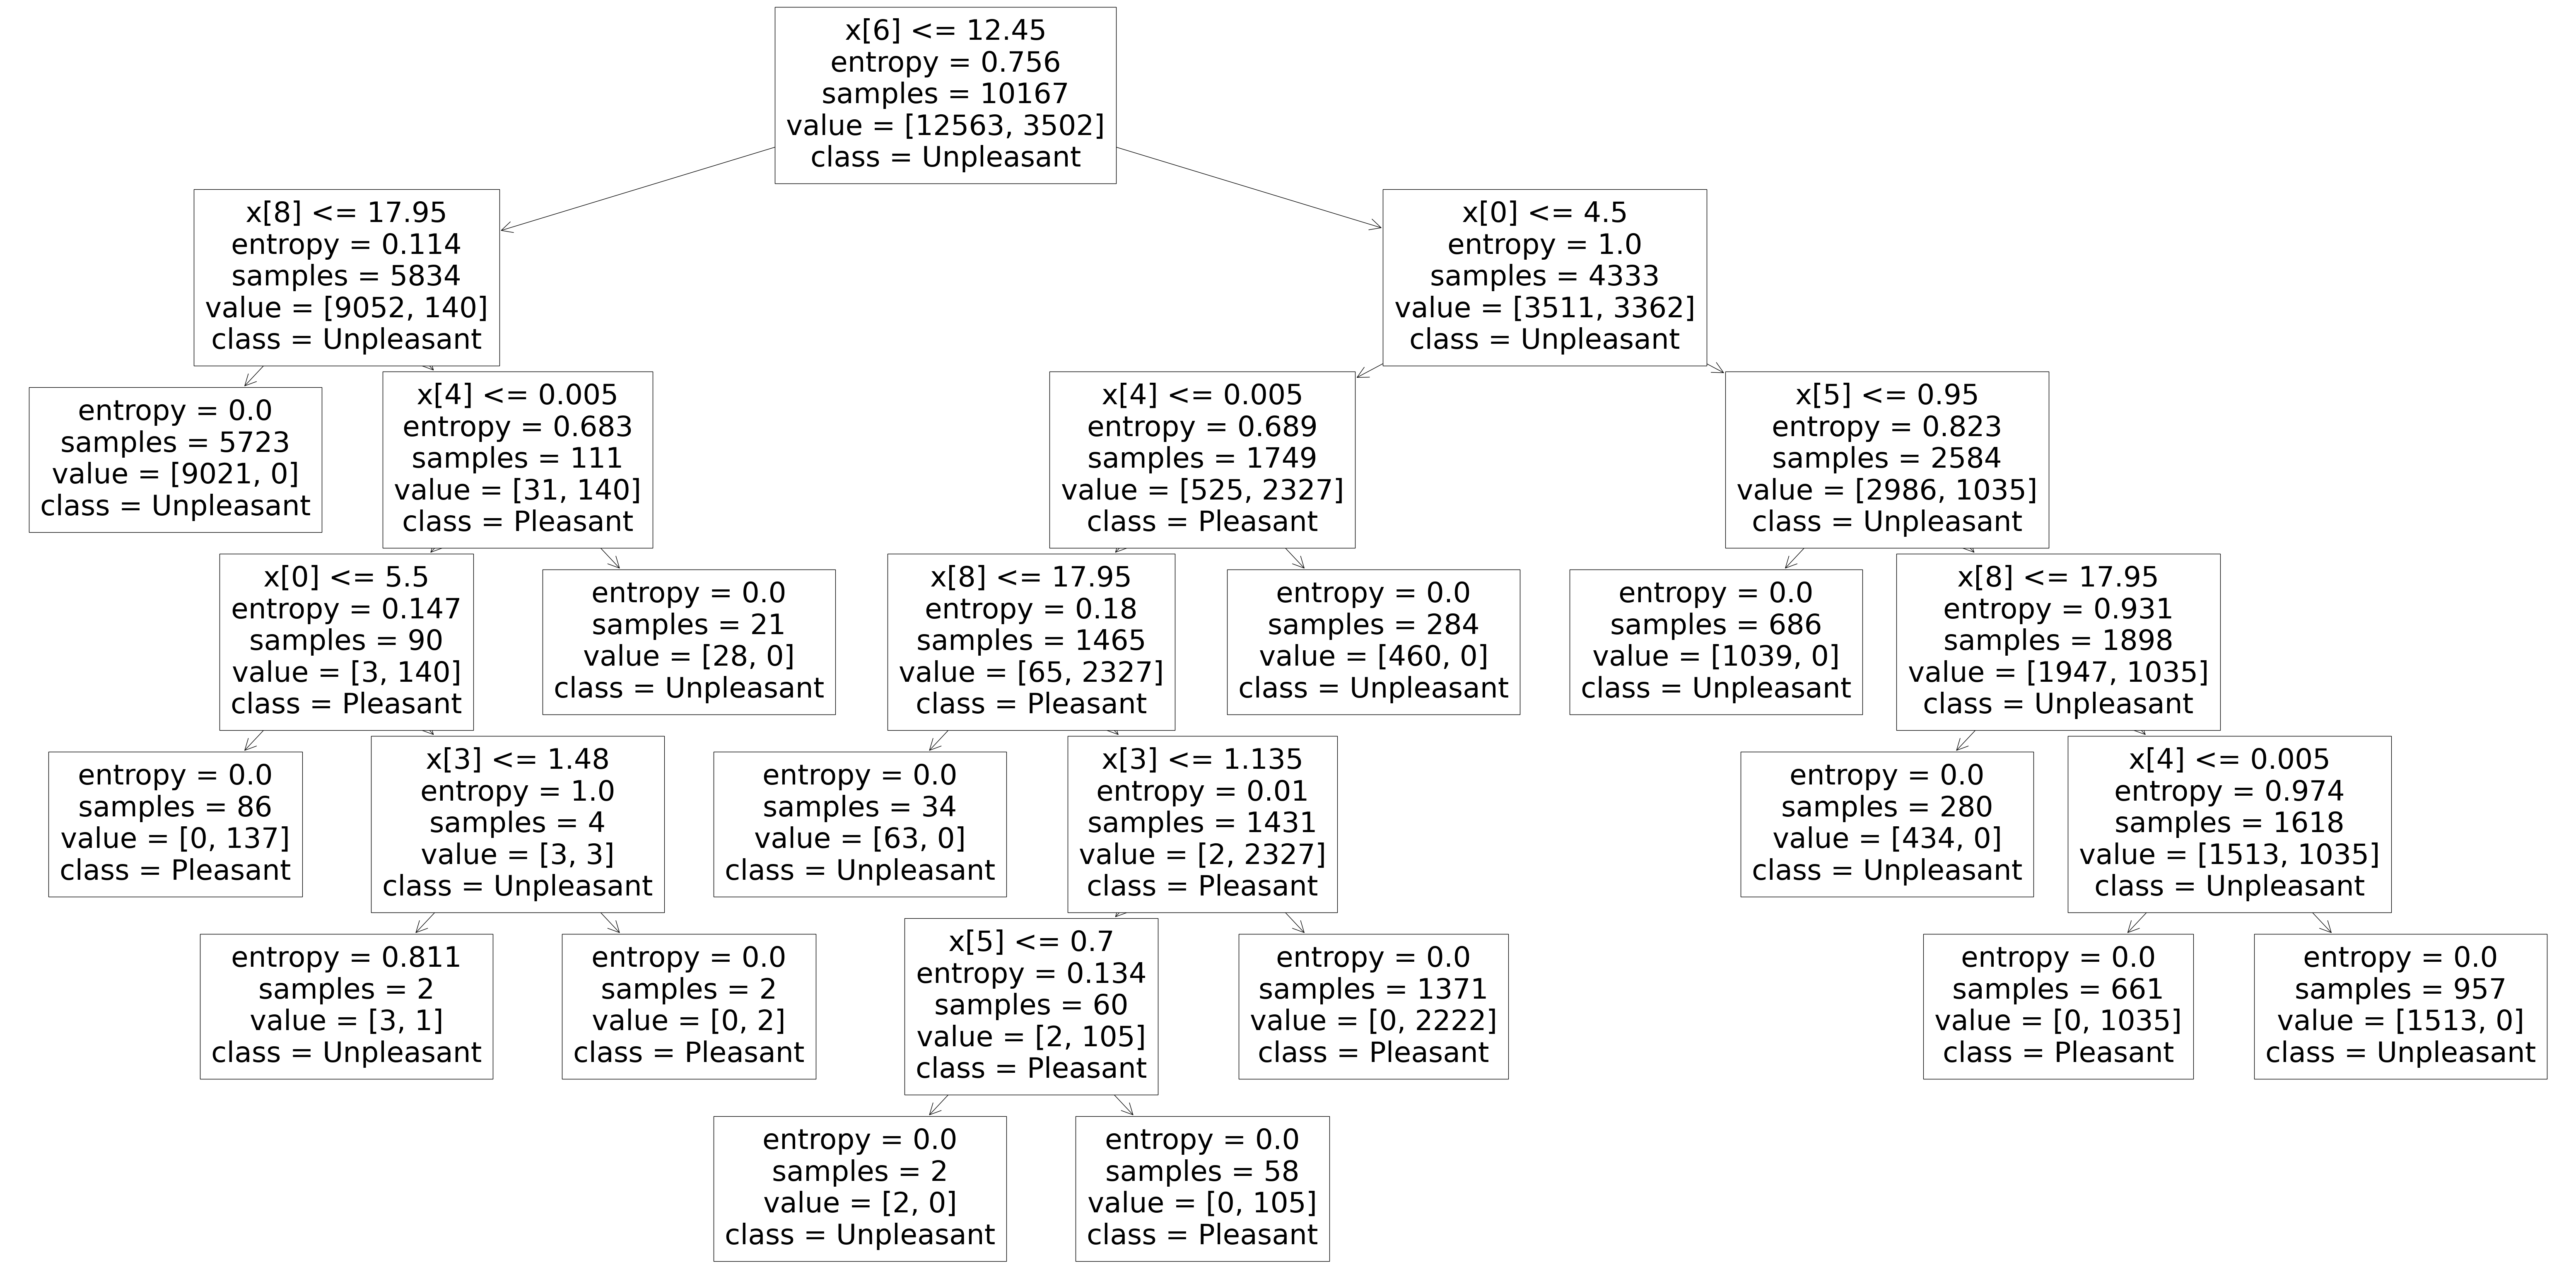

In [96]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf_opt.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [112]:
save_path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\2.03 Complex Machine Learning Models and Keras Part 2'

fig.savefig(f"{save_path}/optmised_tree_weatherDus-01.png")

# Find the most important measures

In [105]:
np.set_printoptions(threshold=np.inf)
newarray = clf_opt.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02159368, 0.00654228, 0.00489136, 0.04919754, 0.35943454,
       0.06891347, 0.10855827, 0.01228309, 0.36858576])

In [106]:
np.set_printoptions(threshold=1000)

In [107]:
print(newarray.shape)

(9,)


In [108]:
# newarray = newarray.reshape(-1,15,9)
# print(newarray.shape)
newarray

array([0.02159368, 0.00654228, 0.00489136, 0.04919754, 0.35943454,
       0.06891347, 0.10855827, 0.01228309, 0.36858576])

In [110]:
important = pd.Series(newarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.021594
humidity            0.006542
pressure            0.004891
global_radiation    0.049198
precipitation       0.359435
sunshine            0.068913
temp_mean           0.108558
temp_min            0.012283
temp_max            0.368586
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


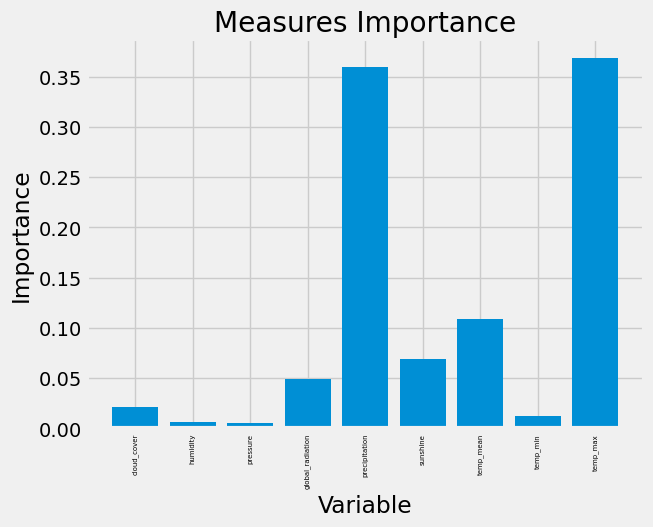

In [111]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_ImportancesAll.png")

### The most improtant measures are:
1. precipitation
2. temp_max